In [1]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import pandas as pd
import numpy
from tensorflow import keras

Visualización del dataset

In [2]:
directory_train='../dataset/train'
directory_test='../dataset/test'

processed_dataset = '../dataset/processed/'

IMG_SIZE = (160, 160)
BATCH_SIZE=32

train_labels_df = pd.read_csv('../dataset/Training_set.csv')
print("Cantidad de clases: ",train_labels_df["label"].nunique())
train_labels_df=train_labels_df.set_index("filename")["label"].to_dict()
train_labels_df


Cantidad de clases:  75


{'Image_1.jpg': 'SOUTHERN DOGFACE',
 'Image_2.jpg': 'ADONIS',
 'Image_3.jpg': 'BROWN SIPROETA',
 'Image_4.jpg': 'MONARCH',
 'Image_5.jpg': 'GREEN CELLED CATTLEHEART',
 'Image_6.jpg': 'CAIRNS BIRDWING',
 'Image_7.jpg': 'GREEN CELLED CATTLEHEART',
 'Image_8.jpg': 'EASTERN DAPPLE WHITE',
 'Image_9.jpg': 'BROWN SIPROETA',
 'Image_10.jpg': 'RED POSTMAN',
 'Image_11.jpg': 'MANGROVE SKIPPER',
 'Image_12.jpg': 'BLACK HAIRSTREAK',
 'Image_13.jpg': 'CABBAGE WHITE',
 'Image_14.jpg': 'RED ADMIRAL',
 'Image_15.jpg': 'PAINTED LADY',
 'Image_16.jpg': 'MANGROVE SKIPPER',
 'Image_17.jpg': 'PAPER KITE',
 'Image_18.jpg': 'SOOTYWING',
 'Image_19.jpg': 'PINE WHITE',
 'Image_20.jpg': 'PEACOCK',
 'Image_21.jpg': 'CHECQUERED SKIPPER',
 'Image_22.jpg': 'JULIA',
 'Image_23.jpg': 'COMMON WOOD-NYMPH',
 'Image_24.jpg': 'BLUE MORPHO',
 'Image_25.jpg': 'CLOUDED SULPHUR',
 'Image_26.jpg': 'STRAITED QUEEN',
 'Image_27.jpg': 'ORANGE OAKLEAF',
 'Image_28.jpg': 'PURPLISH COPPER',
 'Image_29.jpg': 'CLOUDED SULPHUR',
 'Ima

Creación de subfolder para cada clase de mariposa debido a que el dataset de forma nativa no tiene esta estructura

In [3]:
#Para conjuntos de datos de train
for image,label in train_labels_df.items():  
    dest_train_folder = f"{processed_dataset}train/{label}"
    os.makedirs(dest_train_folder,exist_ok=True)  

    image_path_in_original_folder = f"{directory_train}/{image}"
    if os.path.exists(image_path_in_original_folder):
        shutil.move(image_path_in_original_folder,dest_train_folder)

In [4]:
#Para conjunto de datos de test
for image,label in train_labels_df.items():  
    dest_train_folder = f"{processed_dataset}test/{label}"
    os.makedirs(dest_train_folder,exist_ok=True)  

    image_path_in_original_folder = f"{directory_test}/{image}"
    #print(image_path_in_original_folder)
    if os.path.exists(image_path_in_original_folder):
        shutil.move(image_path_in_original_folder,dest_train_folder)

In [63]:
train_dataset = image_dataset_from_directory(directory=f"{processed_dataset}/train",shuffle=True, batch_size=BATCH_SIZE,image_size=IMG_SIZE,seed=42,validation_split=0.2,subset='training')

test_dataset = image_dataset_from_directory(directory=f"{processed_dataset}/train",shuffle=True, batch_size=BATCH_SIZE,image_size=IMG_SIZE,seed=42,validation_split=0.2,subset='validation')

Found 1947 files belonging to 75 classes.
Using 1558 files for training.
Found 1947 files belonging to 75 classes.
Using 389 files for validation.


In [64]:
class_names = train_dataset.class_names
print(class_names)
print(len(class_names))

['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BECKERS WHITE', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA', 'LARGE MARBLE', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK', 'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW', 'PAINTED LADY', 'PAPER KITE', 'PEACOCK', 'PINE WHITE', 'PIPEVINE SWALLOW', 'POPINJAY', 'PURPLE HAIRSTREAK', 'PURPLISH COPPER', 'QUESTION MARK', 'RED ADMIRA

Visualización de imagenes de entrenamiento

Lables:  tf.Tensor(
[50 64 59 51 41  2 29 61 54 21 38  1 11 67 26 13 45 38 19 46 52  8 12 58
 41 14 11 28 35 58 63 21], shape=(32,), dtype=int32)


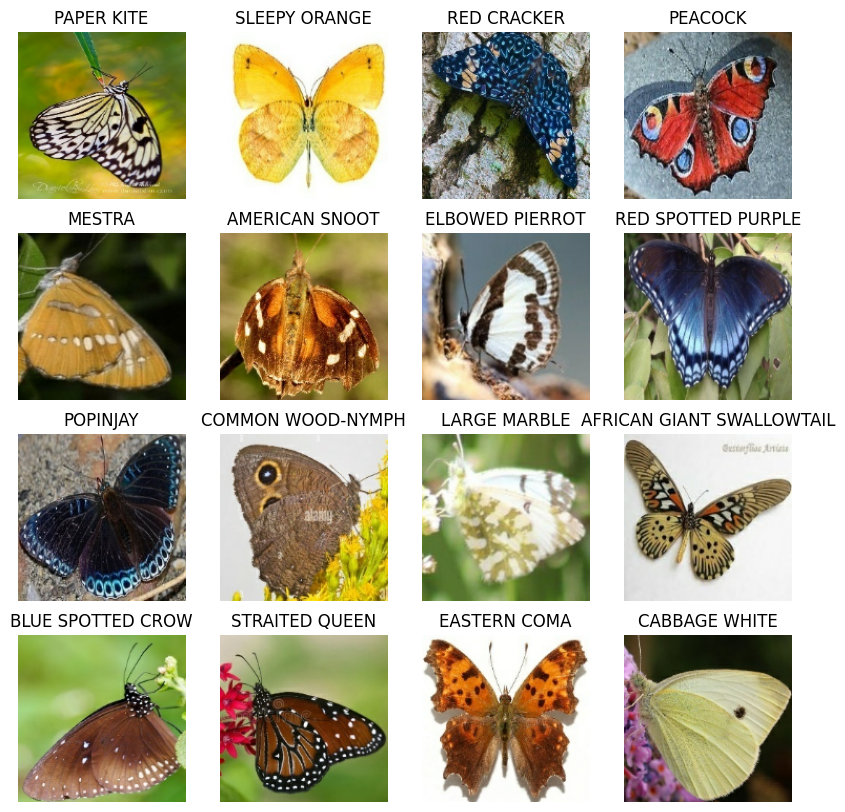

In [7]:
plt.figure(figsize=(10,10))
for images,labels in train_dataset.take(1):
    print("Lables: ",labels)
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        #print("Posicion: ",class_names[i])
        plt.axis('off')
plt.show()

DATA AUGMENTATION

In [8]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2)
])

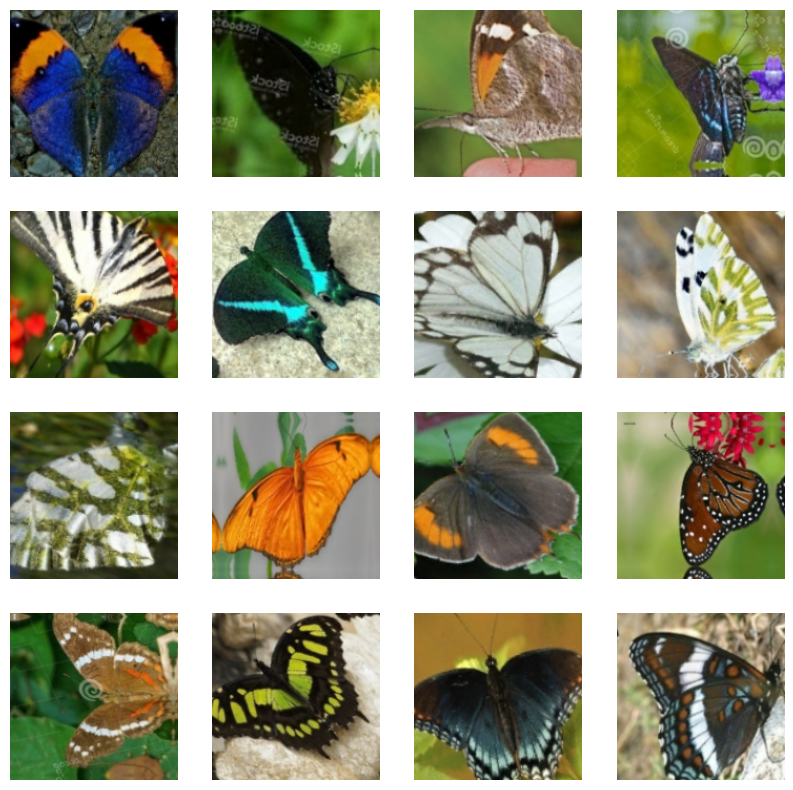

In [9]:
plt.figure(figsize=(10,10))
for images,_ in train_dataset.take(1):
    imgs_augmented = data_augmentation(images)
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(imgs_augmented[i].numpy().astype('uint8'))
        plt.axis("off")
plt.show()

CREACIÓN DE LA RED NEURONAL

In [10]:
CNN = keras.Sequential([
    data_augmentation,
    keras.layers.Rescaling(1./255),
    Conv2D(32, 3, strides=2,padding='same',activation='relu',input_shape=(160,160,3)),
    MaxPooling2D(),
    Conv2D(64,3,strides=2,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(128,3,strides=2,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(256,3,strides=2,padding='same',activation='relu'),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(76),
])


c:\Users\aeagu\Documents\proyectos_de_desarrollo\AI\Reconocimiento de mariposasd\ai_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [126]:
CNN.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [128]:
CNN.fit(train_dataset,validation_data=test_dataset,epochs=100)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.2598 - loss: 2.6602 - val_accuracy: 0.2237 - val_loss: 3.1110
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.2762 - loss: 2.5533 - val_accuracy: 0.2339 - val_loss: 3.0164
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.3134 - loss: 2.3859 - val_accuracy: 0.2339 - val_loss: 3.0462
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.3483 - loss: 2.2885 - val_accuracy: 0.2879 - val_loss: 2.9108
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3750 - loss: 2.1906 - val_accuracy: 0.2982 - val_loss: 2.7094
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3917 - loss: 2.0936 - val_accuracy: 0.3239 - val_loss: 2.5272
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4218 - loss: 1.9780 - val_accuracy: 0.3188 - val_loss: 2.6751
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4382 - loss: 1.9365 - val_accuracy: 0.

In [129]:
CNN.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_16 (Sequential)      │ (32, 160, 160, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_14 (Rescaling)        │ (32, 160, 160, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (32, 80, 80, 32)       │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (32, 40, 40, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (32, 20, 20, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (32, 10, 10, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (32, 5, 5, 128)        │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (32, 2, 2, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (32, 1, 1, 256)        │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (32, 100)              │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (32, 76)               │         7,676 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,265,378 (4.83 MB)

 Trainable params: 421,792 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 843,586 (3.22 MB)

In [132]:
CNN.evaluate(test_dataset)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4341 - loss: 3.9365


[3.7421112060546875, 0.45758354663848877]

In [133]:
classification = CNN.predict(test_dataset)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


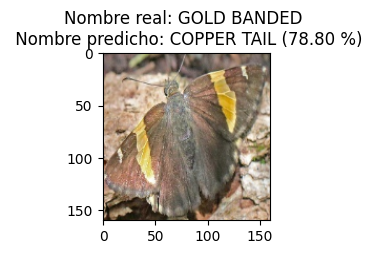

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


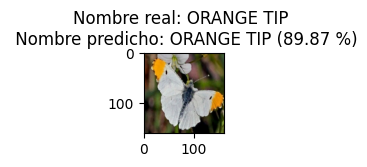

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


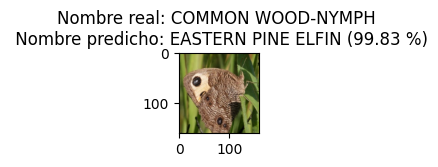

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


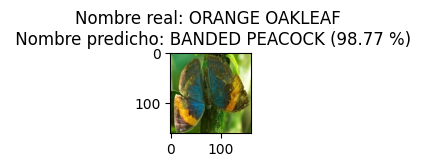

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


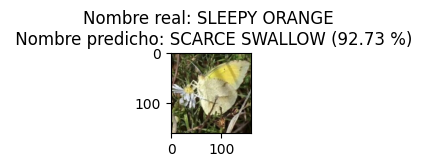

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


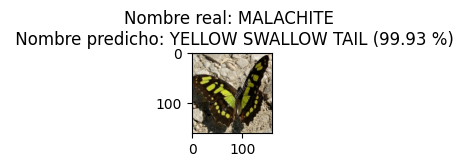

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


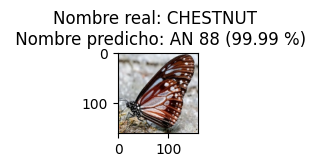

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


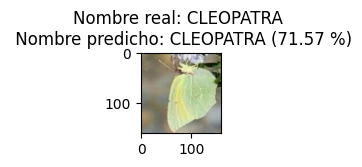

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


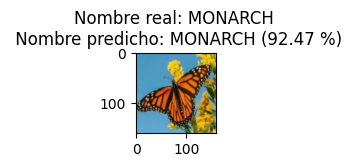

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


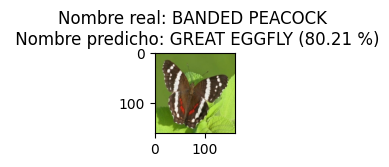

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


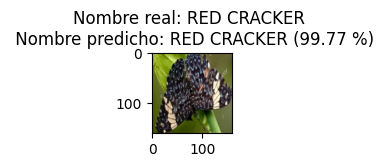

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


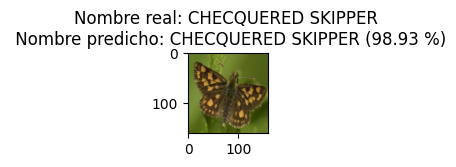

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


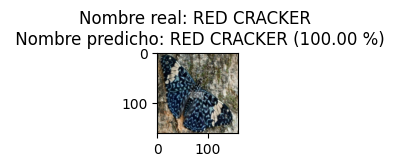

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


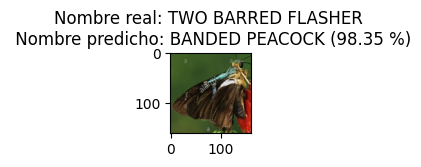

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


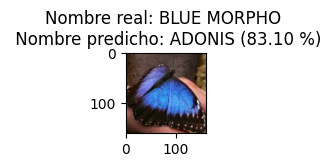

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


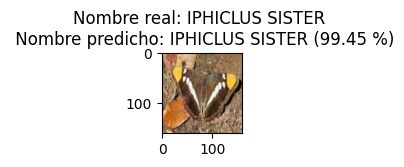

In [138]:
plt.figure(figsize=(10,10))
for images,labels in test_dataset.take(1):
    for i in range(16):
        img_array = tf.keras.preprocessing.image.img_to_array(images[i])
        img_array = tf.expand_dims(img_array,0)

        pred = CNN.predict(img_array)
        score = tf.nn.softmax(pred[0])

        plt.subplot(4,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Nombre real: {class_names[labels[i]]} \n Nombre predicho: {class_names[tf.argmax(score)]} ({format(100*tf.reduce_max(score),'.2f')} %)")
        plt.show()

#Implemetación de mmodelo pre entrenados

In [35]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2, DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np

In [103]:
batch_size = 32
img_height, img_width = 224, 224 
IMG_SIZE = (224,224) 

train_data_dir = '../dataset//processed/train'
validation_data_dir = '../dataset/processed/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'  
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'  
)

Found 1589 images belonging to 75 classes.
Found 358 images belonging to 75 classes.


In [96]:
train_generator.class_indices

{'ADONIS': 0,
 'AFRICAN GIANT SWALLOWTAIL': 1,
 'AMERICAN SNOOT': 2,
 'AN 88': 3,
 'APPOLLO': 4,
 'ATALA': 5,
 'BANDED ORANGE HELICONIAN': 6,
 'BANDED PEACOCK': 7,
 'BECKERS WHITE': 8,
 'BLACK HAIRSTREAK': 9,
 'BLUE MORPHO': 10,
 'BLUE SPOTTED CROW': 11,
 'BROWN SIPROETA': 12,
 'CABBAGE WHITE': 13,
 'CAIRNS BIRDWING': 14,
 'CHECQUERED SKIPPER': 15,
 'CHESTNUT': 16,
 'CLEOPATRA': 17,
 'CLODIUS PARNASSIAN': 18,
 'CLOUDED SULPHUR': 19,
 'COMMON BANDED AWL': 20,
 'COMMON WOOD-NYMPH': 21,
 'COPPER TAIL': 22,
 'CRECENT': 23,
 'CRIMSON PATCH': 24,
 'DANAID EGGFLY': 25,
 'EASTERN COMA': 26,
 'EASTERN DAPPLE WHITE': 27,
 'EASTERN PINE ELFIN': 28,
 'ELBOWED PIERROT': 29,
 'GOLD BANDED': 30,
 'GREAT EGGFLY': 31,
 'GREAT JAY': 32,
 'GREEN CELLED CATTLEHEART': 33,
 'GREY HAIRSTREAK': 34,
 'INDRA SWALLOW': 35,
 'IPHICLUS SISTER': 36,
 'JULIA': 37,
 'LARGE MARBLE': 38,
 'MALACHITE': 39,
 'MANGROVE SKIPPER': 40,
 'MESTRA': 41,
 'METALMARK': 42,
 'MILBERTS TORTOISESHELL': 43,
 'MONARCH': 44,
 'MOURNING

MODELO INCEPTION

In [27]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


Para no re entrenar el modelo base se usa esto:

In [28]:
base_model.trainable = False  # Congela el modelo base

In [82]:
model = Sequential([
    base_model, 
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes)
])

model.compile(optimizer=Adam(learning_rate=0.00001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [83]:
epochs = 10  

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.0175 - loss: 4.8729 - val_accuracy: 0.0169 - val_loss: 4.3364
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.0203 - loss: 4.3439 - val_accuracy: 0.0104 - val_loss: 4.3341
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.0285 - loss: 4.2624 - val_accuracy: 0.0129 - val_loss: 4.3359
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.0418 - loss: 4.2468 - val_accuracy: 0.0090 - val_loss: 4.3406
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.0464 - loss: 4.2036 - val_accuracy: 0.0126 - val_loss: 4.3502
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.0424 - loss: 4.2057 - val_accuracy: 0.0151 - val_loss: 4.3580
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.0494 - loss: 4.1676 - val_accuracy: 0.0129 - val_loss: 4.3577
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.0535 - loss: 4.1283 - val_accuracy: 0.0115 - val_loss:

In [31]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Accuracy en conjunto de validación: {accuracy * 100:.2f}%")

88/88 ━━━━━━━━━━━━━━━━━━━━ 38s 426ms/step - accuracy: 0.0135 - loss: 9.7889
Accuracy en conjunto de validación: 1.36%


MODELO CON RESNET50

In [88]:
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
#base_model_resnet50.trainable = False

for layer in base_model.layers[-15:]:  # Últimas 10 capas
    layer.trainable = True

model_resnet50 = Sequential([
    base_model_resnet50,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes)
])


model_resnet50.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

epochs = 10  

history_resnet50 = model_resnet50.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)



Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 433s 7s/step - accuracy: 0.1361 - loss: 3.9371 - val_accuracy: 0.0144 - val_loss: 711.2756
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 379s 6s/step - accuracy: 0.3961 - loss: 2.3342 - val_accuracy: 0.0133 - val_loss: 19.3137
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 392s 6s/step - accuracy: 0.5817 - loss: 1.5310 - val_accuracy: 0.0140 - val_loss: 4.6752
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 392s 6s/step - accuracy: 0.6667 - loss: 1.1889 - val_accuracy: 0.0151 - val_loss: 4.7671
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 394s 6s/step - accuracy: 0.7283 - loss: 0.8990 - val_accuracy: 0.0151 - val_loss: 5.1297
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 394s 6s/step - accuracy: 0.7552 - loss: 0.8260 - val_accuracy: 0.0154 - val_loss: 6.4206
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 352s 6s/step - accuracy: 0.7979 - loss: 0.6153 - val_accuracy: 0.0151 - val_loss: 5.0209
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 344s 6s/step - accuracy: 0.8441 - loss: 0.5243 - val_accuracy: 0.0144 

KeyboardInterrupt: 

In [34]:
loss, accuracy = model_resnet50.evaluate(train_generator)
print(f"Accuracy en conjunto de validación: {accuracy * 100:.2f}%")

61/61 ━━━━━━━━━━━━━━━━━━━━ 60s 987ms/step - accuracy: 0.0131 - loss: 5.0956
Accuracy en conjunto de validación: 1.34%


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


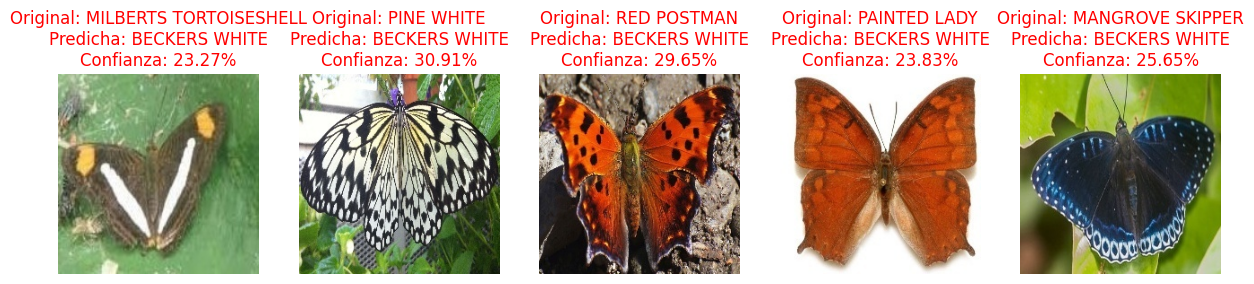

In [ ]:
# Tomo un batch de imágenes del generador de validación
validation_images, validation_labels = next(iter(validation_generator))

predictions = model_resnet50.predict(validation_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(validation_labels, axis=1)

class_names = list(validation_generator.class_indices.keys())

num_images_to_display = 5  
plt.figure(figsize=(15, 15))

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(validation_images[i])
    plt.axis('off')
    true_class = class_names[true_labels[i]]
    predicted_class = class_names[predicted_labels[i]]
    confidence = predictions[i][predicted_labels[i]] * 100  
    title = f"Original: {true_class}\nPredicha: {predicted_class}\nConfianza: {confidence:.2f}%"
    plt.title(title, color=("green" if true_class == predicted_class else "red"))

plt.show()

MOBILNET

In [104]:
from tensorflow.keras.applications import MobileNetV2

base_model_MobileNetV2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model_MobileNetV2.trainable = False
#for layer in base_model_MobileNetV2.layers[-30:]:  # Descongela las últimas 30 capas
#    layer.trainable = True

model_base_model_MobileNetV2 = Sequential([
    base_model_MobileNetV2,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(train_generator.num_classes)
])

model_base_model_MobileNetV2.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

epochs = 10  

history_resnet50 = model_base_model_MobileNetV2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

c:\Users\aeagu\Documents\proyectos_de_desarrollo\AI\Reconocimiento de mariposasd\ai_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 806ms/step - accuracy: 0.0100 - loss: 11.9527 - val_accuracy: 0.0168 - val_loss: 12.5911
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 837ms/step - accuracy: 0.0094 - loss: 12.6158 - val_accuracy: 0.0056 - val_loss: 12.5911
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 856ms/step - accuracy: 0.0064 - loss: 12.6926 - val_accuracy: 0.0084 - val_loss: 12.5911
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 848ms/step - accuracy: 0.0051 - loss: 12.4661 - val_accuracy: 0.0140 - val_loss: 12.5911
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 892ms/step - accuracy: 0.0040 - loss: 12.8413 - val_accuracy: 0.0084 - val_loss: 12.5911
Epoch 6/10
35/50 ━━━━━━━━━━━━━━━━━━━━ 10s 699ms/step - accuracy: 0.0050 - loss: 12.3099

KeyboardInterrupt: 